In [ ]:
# Make function to evaluate (a*dx)**2 vs (a_bar*dx)**2
# Quick and messy dispersion graph plotter

/home/ed/.local/lib/python3.6/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/home/ed/.local/lib/python3.6/site-packages/ipykernel/__main__.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/ed/.local/lib/python3.6/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/ed/.local/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in sqrt


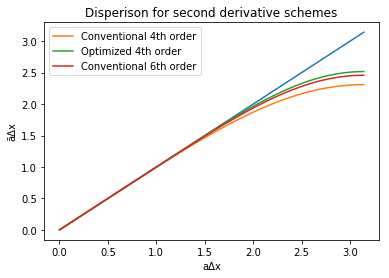

In [26]:
from numpy import exp, sum, linspace, pi, array, zeros, sqrt
import matplotlib.pyplot as plt

# k = a*dx
def a_bar_calc(k, a):
    return -1.*sum([a[i]*exp(float(i-3)*1j*k) for i in range(7)])

opt_coeffs = array([0.01564992, -0.17723283,  1.56808208, -2.81299833, 1.56808208, -0.17723283, 0.01564992])
con_coeffs = array([0, -1./12.,  4./3., -5./2., 4./3., -1./12., 0])
con_6_coeffs = array([1./90., -3./20.,  3./2., -49./18., 3./2., -3./20., 1./90.])

a_dx_vals = linspace(0, pi, 200)
opt_square_vals = zeros(200)
con_square_vals = zeros(200)
con_6_square_vals = zeros(200)

for i in range(200):
    opt_square_vals[i] = a_bar_calc(a_dx_vals[i], opt_coeffs)
    con_square_vals[i] = a_bar_calc(a_dx_vals[i], con_coeffs)
    con_6_square_vals[i] = a_bar_calc(a_dx_vals[i], con_6_coeffs)

fig = plt.figure()
plt.plot(a_dx_vals, a_dx_vals)
plt.plot(a_dx_vals, sqrt(con_square_vals), label='Conventional 4th order')
plt.plot(a_dx_vals, sqrt(opt_square_vals), label='Optimized 4th order')
plt.plot(a_dx_vals, sqrt(con_6_square_vals), label='Conventional 6th order')
plt.title("Disperison for second derivative schemes")
plt.legend(loc='best')
plt.xlabel("aΔx")
plt.ylabel("āΔx")
plt.show()